# Coronavirus Brasil - Gráficos estáticos
> Gráficos e análises dos estados brasileiros

- toc: false
- branch: master
- badges: false
- comments: false
- author: Vinicius Bastos Gomes & Fernando Wittmann
- categories: [coronavirus]



In [0]:
#hide
# Imports
import warnings
warnings.filterwarnings('ignore')
import gzip
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
sns.set(style="ticks", rc={"lines.linewidth": 1.6})
sns.set_palette('dark')

In [132]:
#hide

!pip install plotly --upgrade

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.6.0)


In [133]:
#hide
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
#hide
# Abrir pasta com os arquivos
%cd "/content/drive/My Drive/CoronaVirus Brasil"

/content/drive/My Drive/CoronaVirus Brasil


In [0]:
#hide
!rm '/content/drive/My Drive/CoronaVirus Brasil/caso.csv.gz'

In [0]:
#hide
# Parameters
BOLETIM = 'https://data.brasil.io/dataset/covid19/boletim.csv.gz'
CASOS = 'https://data.brasil.io/dataset/covid19/caso.csv.gz'

In [0]:
#hide
# Functions
def sigla_nome(x):
    return dic[x]

def populacao(x):
    return popu[x]

In [138]:
#hide
# Execution
!wget {CASOS}

--2020-04-02 18:39:32--  https://data.brasil.io/dataset/covid19/caso.csv.gz
Resolving data.brasil.io (data.brasil.io)... 192.99.5.40
Connecting to data.brasil.io (data.brasil.io)|192.99.5.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42190 (41K) [application/gzip]
Saving to: ‘caso.csv.gz’

caso.csv.gz         100%[===================>]  41.20K  --.-KB/s    in 0.001s  

2020-04-02 18:39:33 (37.0 MB/s) - ‘caso.csv.gz’ saved [42190/42190]



In [139]:
#hide
#manipulating datetime
todei = date.today()
today = todei.strftime("%d-%m-%Y")
today_us = todei.strftime("%Y-%m-%d")
today_us
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')

'2020-04-01'

In [0]:

#hide
with gzip.open('caso.csv.gz', 'rb') as f_in:
    with open('caso.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [141]:
#hide
ls

2020-04-02-corona-brasil-estatico.ipynb    caso.csv
2020-04-02-corona-brasil-interativo.ipynb  caso.csv.gz
2020-04-02-corona-mundo-estatico.ipynb     caso.csv.gz.1
2020-04-02-corona-mundo-interativo.ipynb   dados.csv
ANO_MES_DIA_projecao_brasil.ipynb          graficovid/
Brasil.ipynb                               plots/


In [0]:
#hide
#dictionaries
casos = pd.read_csv('caso.csv')
dic = {'AC': "Acre",  'AL': "Alagoas",  'AM': "Amapá", 'AP': "Amazonas", 'BA': "Bahia", 'CE': "Ceará", 'DF': "Distrito Federal",'ES': "Espírito Santo",'GO': "Goiás",'MA': "Maranhão",'MG': "Minas Gerais",'MS': "Mato Grosso do Sul",'MT': "Mato Grosso",'PA': "Pará",'PB': "Paraíba",'PE': "Pernambuco",'PI': "Piauí",'PR': "Paraná",'RJ': "Rio de Janeiro",'RN': "Rio Grande do Norte",'RO': "Rondônia",'RR': "Roraima",'RS': "Rio Grande do Sul",'SC': "Santa Catarina",'SE': "Sergipe",'SP': "São Paulo",'TO': "Tocantins"} 
popu ={'AC': 881935,'AL': 3337357,'AM': 4144597,'AP': 845731,'BA': 14873064,'CE': 9132078,'DF': 3015268,'ES': 4018650,'GO': 7018354,'MA': 7075181,'MG': 21168791,'MS': 2778986,'MT': 3484466,'PA': 8602865,'PB': 4018127,'PE': 9557071,'PI': 3273227,'PR': 11433957,'RJ': 17264943,'RN': 3506853,'RO': 1777225,'RR': 605761,'RS': 11377239,'SC': 7164788,'SE': 2298696,'SP': 45919049,'TO': 1572866}

In [0]:
#hide
#casos.set_index('date',inplace=True)


In [143]:
#hide
casos

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-01,SC,NaN,state,247,2.0,21,True,7164788.0,42.0,3.44742,0.0081
1,2020-03-31,SC,NaN,state,235,2.0,20,False,7164788.0,42.0,3.27993,0.0085
2,2020-03-30,SC,NaN,state,219,2.0,19,False,7164788.0,42.0,3.05662,0.0091
3,2020-03-29,SC,NaN,state,197,1.0,18,False,7164788.0,42.0,2.74956,0.0051
4,2020-03-28,SC,NaN,state,184,1.0,17,False,7164788.0,42.0,2.56812,0.0054
...,...,...,...,...,...,...,...,...,...,...,...,...
4134,2020-03-27,BA,Teixeira de Freitas,city,1,0.0,4,False,160487.0,2931350.0,0.62310,NaN
4135,2020-03-26,BA,Teixeira de Freitas,city,1,0.0,3,False,160487.0,2931350.0,0.62310,NaN
4136,2020-03-25,BA,Teixeira de Freitas,city,1,0.0,2,False,160487.0,2931350.0,0.62310,NaN
4137,2020-03-24,BA,Teixeira de Freitas,city,1,0.0,1,False,160487.0,2931350.0,0.62310,NaN


In [144]:
#hide
sp = casos[casos['state']=='SP']
x = sp[sp.duplicated('date')]
x

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1301,2020-04-01,SP,Americana,city,2,0.0,2,True,239597.0,3501608.0,0.83473,NaN
1302,2020-03-31,SP,Americana,city,2,0.0,1,False,239597.0,3501608.0,0.83473,NaN
1303,2020-04-01,SP,Araçatuba,city,2,0.0,2,True,197016.0,3502804.0,1.01515,NaN
1304,2020-03-31,SP,Araçatuba,city,1,0.0,1,False,197016.0,3502804.0,0.50757,NaN
1305,2020-04-01,SP,Arujá,city,2,0.0,5,True,89824.0,3503901.0,2.22658,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1695,2020-03-31,SP,Vinhedo,city,1,0.0,1,False,78728.0,3556701.0,1.27020,NaN
1696,2020-04-01,SP,Votorantim,city,1,0.0,2,True,122480.0,3557006.0,0.81646,NaN
1697,2020-03-31,SP,Votorantim,city,1,0.0,1,False,122480.0,3557006.0,0.81646,NaN
1698,2020-04-01,SP,Votuporanga,city,1,0.0,2,True,94547.0,3557105.0,1.05768,NaN


In [145]:
#hide
y = casos[casos.duplicated(subset=['date','city'])]
y

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
435,2020-04-01,RS,NaN,state,316,5.0,20,True,11377239.0,43.0,2.77748,0.0158
436,2020-03-31,RS,NaN,state,305,4.0,19,False,11377239.0,43.0,2.68079,0.0131
437,2020-03-30,RS,NaN,state,254,4.0,18,False,11377239.0,43.0,2.23253,0.0157
438,2020-03-29,RS,NaN,state,230,2.0,17,False,11377239.0,43.0,2.02158,0.0087
439,2020-03-28,RS,NaN,state,200,2.0,16,False,11377239.0,43.0,1.75790,0.0100
...,...,...,...,...,...,...,...,...,...,...,...,...
3986,2020-03-28,BA,Importados/Indefinidos,city,0,0.0,5,False,NaN,NaN,NaN,NaN
3987,2020-03-27,BA,Importados/Indefinidos,city,0,0.0,4,False,NaN,NaN,NaN,NaN
3988,2020-03-26,BA,Importados/Indefinidos,city,7,0.0,3,False,NaN,NaN,NaN,NaN
3989,2020-03-25,BA,Importados/Indefinidos,city,3,0.0,2,False,NaN,NaN,NaN,NaN


In [0]:
#hide
casos = casos.drop_duplicates(['date','city'],keep='first')

In [0]:
#hide
casos_por_estado = casos.groupby(['state','date']).sum()[['confirmed', 'deaths']]


In [0]:
#hide
casos_por_estado = casos_por_estado.reset_index(level=[0,1])



In [149]:
#hide

casos_por_estado['date'] = pd.to_datetime(casos_por_estado['date'],infer_datetime_format=True)
casos_por_estado[casos_por_estado['state']=='São Paulo']

,state,date,confirmed,deaths


In [150]:
#hide
x = casos_por_estado[casos_por_estado.duplicated(subset=['state','date'])]
x

,state,date,confirmed,deaths


In [151]:
#hide
#casos_por_estado.set_index('date',inplace=True)
casos_por_estado.tail(5)

,state,date,confirmed,deaths
468,TO,2020-03-28,9,0.0
469,TO,2020-03-29,10,0.0
470,TO,2020-03-30,11,0.0
471,TO,2020-03-31,12,0.0
472,TO,2020-04-01,12,0.0


In [152]:
#hide
# adding a relative approach column
casos_por_estado['população']=casos_por_estado['state']
casos_por_estado['população'] = casos_por_estado['população'].apply(populacao)
casos_por_estado['Relativa'] = 10000*(casos_por_estado['confirmed']/casos_por_estado['população']) #a cada 10 mil
casos_por_estado.tail(5)

,state,date,confirmed,deaths,população,Relativa
468,TO,2020-03-28,9,0.0,1572866,0.057220
469,TO,2020-03-29,10,0.0,1572866,0.063578
470,TO,2020-03-30,11,0.0,1572866,0.069936
471,TO,2020-03-31,12,0.0,1572866,0.076294
472,TO,2020-04-01,12,0.0,1572866,0.076294


In [153]:
#hide
casos_por_estado[casos_por_estado['state']=='SP'].tail(5)

,state,date,confirmed,deaths,população,Relativa
454,SP,2020-03-26,1016,57.0,45919049,0.221259
455,SP,2020-03-27,1179,67.0,45919049,0.256756
456,SP,2020-03-30,1470,112.0,45919049,0.320129
457,SP,2020-03-31,2286,135.0,45919049,0.497833
458,SP,2020-04-01,2922,164.0,45919049,0.636337


In [0]:
#hide

# Generalizando para um loop
#plt.figure(figsize=(16, 8))
#lista_estados = casos_por_estado['state'].unique()
#
#for estado in lista_estados:
#    confirmed = casos_por_estado[casos_por_estado['state']==estado][['date', 'confirmed']]
#    confirmed['date'] = pd.to_datetime(confirmed['date'])
#    plt.plot(confirmed['date'], confirmed['confirmed'], label=estado)
#
#plt.legend()


In [154]:
#hide
# Change states` names
casos_por_estado['state'] = casos_por_estado['state'].apply(sigla_nome)
casos_por_estado.tail()

,state,date,confirmed,deaths,população,Relativa
468,Tocantins,2020-03-28,9,0.0,1572866,0.057220
469,Tocantins,2020-03-29,10,0.0,1572866,0.063578
470,Tocantins,2020-03-30,11,0.0,1572866,0.069936
471,Tocantins,2020-03-31,12,0.0,1572866,0.076294
472,Tocantins,2020-04-01,12,0.0,1572866,0.076294


In [155]:
#hide
#beggining on march 5
casos_por_estado['date'] = pd.to_datetime(casos_por_estado['date']) 
casos_mar5 = casos_por_estado[casos_por_estado['date']>='2020-03-15']
casos_mar5.head()


,state,date,confirmed,deaths,população,Relativa
0,Acre,2020-03-17,3,0.0,881935,0.034016
1,Acre,2020-03-18,3,0.0,881935,0.034016
2,Acre,2020-03-19,4,0.0,881935,0.045355
3,Acre,2020-03-20,7,0.0,881935,0.079371
4,Acre,2020-03-21,11,0.0,881935,0.124726


<center> <h2> Gráficos de contaminação </h2> </center>


In [0]:
#hide
casos_mar5.sort_values('confirmed',ascending=False,inplace=True)
casos_mar5.columns = ['Estado','Data',"Casos","Óbitos",'População','Relativa']
hue1 = casos_mar5['Estado'].unique()

In [157]:
#hide_input

##absolute approach line plot
#plt.figure(figsize=(15,8))
#sns.lineplot(x='date',y='confirmed',data=casos_mar5,hue='state',size="state",hue_order=hue1)
#plt.title('COVID-19 Brasil \n Linhas de casos totais por estado - {} \n Estados expostos de forma decrescente quanto ao número total de casos'.format(today))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.xlabel('Data')
#plt.ylabel('Número de casos totais')
#plt.savefig("plots/15_curvas_brasileiras.png")

import plotly.express as px

fig = px.line(casos_mar5, x="Data", y="Casos", title='COVID-19 - Casos confirmados - {}'.format(today),
              color='Estado',color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()

In [0]:
#hide
casos_mar5.sort_values('Relativa',ascending=False,inplace=True)
hue = casos_mar5['Estado'].unique()

In [159]:
#hide_input

#Relativa approach line plot
#casos_mar5.sort_values('Relativa',ascending=False,inplace=True)
#plt.figure(figsize=(15,8))
#sns.lineplot(x='date',y='Relativa',data=casos_mar5,hue='state',size="state",hue_order=hue)
#plt.title('COVID-19 Brasil \n Crescimento por estado a cada 10 mil habitatnes  {} \n Estados expostos de forma decrescente quanto ao número relativo de casos'.format(today))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.xlabel('Dia')
#plt.ylabel('Número de casos a cada 10 mil habitantes')
#plt.savefig("plots/16_brasil_curva_relativa.png",bbox_inches = 'tight')


fig = px.line(casos_mar5, x="Data", y="Casos", title='COVID-19 Brasil \n Crescimento por estado a cada 10 mil habitatnes  {}'.format(today),
              color='Estado',color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()

In [0]:
#hide
casos_mar5 =casos_mar5.sort_values(['Estado','Data'])

In [161]:
#hide
df_last = casos_mar5.groupby('Estado').max()[['Data','Casos','Óbitos','Relativa']]
df_last = df_last.reset_index()
df_last.tail(3)
df_last.sort_values("Casos",ascending=False)

,Estado,Data,Casos,Óbitos,Relativa
25,São Paulo,2020-04-01,2922,164.0,0.636337
20,Rio de Janeiro,2020-04-01,832,28.0,0.481901
23,Santa Catarina,2020-04-01,494,4.0,0.689483
5,Ceará,2020-04-01,445,9.0,0.487293
6,Distrito Federal,2020-04-01,370,4.0,1.227088
12,Minas Gerais,2020-04-02,370,6.0,0.174786
19,Rio Grande do Sul,2020-04-01,316,5.0,0.277748
4,Bahia,2020-04-01,246,2.0,0.165400
13,Paraná,2020-04-01,224,3.0,0.195908
2,Amapá,2020-04-01,200,3.0,0.482556


In [0]:
#hide
#dropping DF
df_last_semdf = df_last[df_last['Estado']!='Distrito Federal']

In [163]:
#hide_input
# absolute approach bar plot
#df_last.sort_values('confirmed',ascending=False,inplace=True)
#plt.figure(figsize=(6,9))
#sns.barplot(df_last['confirmed'],df_last['state'],orient="h",)
#plt.ylabel('Estados brasileiros')
#plt.xlabel('Número total de infectados')
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.title('COVID-19 Brasil \n Casos totais por estado - {}'.format(today))
#
#
#plt.savefig('plots/12_brasil',bbox_inches = 'tight')
df_last.sort_values('Casos',ascending=False,inplace=True)

fig = px.bar(df_last,x="Casos", y='Estado', color='Estado',orientation='h',
             color_discrete_sequence=px.colors.qualitative.Alphabet,title='COVID-19 Brasil \n Casos totais por estado - {}'.format(today))#.update_yaxes(categoryorder='total dscending')

fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})

In [164]:
#hide_input

# relative approach bar plot

#df_last.sort_values('Relativa',ascending=False,inplace=True)
#plt.figure(figsize=(6,9))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.title('COVID-19 Brasil \n Casos a cada 10 mil habitantes (por estado) - {}'.format(today))
#plt.ylabel('Estados brasileiros')
#plt.xlabel('Infectados a cada 10 mil habitantes')
#sns.barplot(df_last['Relativa'],df_last['state'],orient="h")
#
#plt.savefig('plots/13_brasil_relativo',bbox_inches = 'tight')
#
#
#df_last.sort_values('Casos')
df_last.sort_values('Relativa',ascending=False,inplace=True)
fig = px.bar(df_last,x="Relativa", y='Estado', color='Estado',orientation='h',
             color_discrete_sequence=px.colors.qualitative.Dark24,title='COVID-19 Brasil \n Casos a cada 10 mil habitantes (por estado) - {}'.format(today))#.update_yaxes(categoryorder='total dscending')

fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})

In [0]:
#hide
df_last_semdf.sort_values('Relativa',ascending=False,inplace=True)


In [166]:
#hide_input

# relative approach bar plot (without DF)

#plt.figure(figsize=(6,9))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#sns.barplot(df_last_semdf['Relativa'],df_last_semdf['state'],orient="h")
#
#plt.title('COVID-19 Brasil \n Casos a cada 10 mil habitantes (por estado - sem DF) - {}'.format(today))
#plt.ylabel('Estados brasileiros')
#plt.xlabel('Infectados a cada 10 mil habitantes')
#plt.savefig('plots/14_brasil_relativo_sem_df',bbox_inches = 'tight')

fig = px.bar(df_last_semdf,x="Relativa", y='Estado', color='Estado',orientation='h',
             color_discrete_sequence=px.colors.qualitative.Alphabet,title='COVID-19 Brasil \n Casos a cada 10 mil habitantes (por estado - sem DF) - {}'.format(today))

fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})

In [0]:
#hide
#plt.figure(figsize=(15,8))
#sns.lineplot(x='date',y='confirmed',data=x)
#plt.title('COVID-19 - Crescimento {}(relativo)- {}'.format(y,today))
#texto1 = 'Quarentena'
#plt.text('2020-03-24',125,texto1,fontsize=12)
#
#plt.grid(color='black', linestyle='--', linewidth=0.17)


In [0]:
#hide
# exporting xlsx to concat with up to date data
#df_last1 = casos_mar5
#df_last1.columns = ['Estado', 'Dia','Casos','Mortes','População','Relativa']
#df_last1 = df_last1.reindex(columns=['Dia','Casos','Estado','Mortes','População','Relativa'])
#df2 = df_last1[df_last1['Dia']<'2020-03-25']
#df2.tail(3)

In [0]:
#hide
#df2.to_excel('graficovid/Tabela_brasil_até_25.xlsx',index=False)

In [169]:
#hide
casos_mar5.columns

Index(['Estado', 'Data', 'Casos', 'Óbitos', 'População', 'Relativa'], dtype='object')

In [0]:
#hide
casos_mar5.columns = ['Estado', 'Dia', 'Casos', 'Mortes', 'população', 'Relativa']

In [0]:
#hide
sul = casos_mar5[(casos_mar5['Estado']=='Paraná') | (casos_mar5['Estado']=='Santa Catarina') | (casos_mar5['Estado']=='Rio Grande do Sul')]

In [0]:
#hide
sudeste = casos_mar5[(casos_mar5['Estado']=='São Paulo') | (casos_mar5['Estado']=='Minas Gerais') | (casos_mar5['Estado']=='Rio de Janeiro') | (casos_mar5['Estado']=='Espírito Santo ')]

In [0]:
#hide
centroeste =  casos_mar5[(casos_mar5['Estado']=='Goiás') | (casos_mar5['Estado']=='Mato Grosso') | (casos_mar5['Estado']=='Mato Grosso do Sul')| (casos_mar5['Estado']=='Distrito Federal')]

In [0]:
#hide
norte = casos_mar5[(casos_mar5['Estado']=='Acre') | (casos_mar5['Estado']=='Amapá') | (casos_mar5['Estado']=='Amazonas') | (casos_mar5['Estado']=='Pará') | (casos_mar5['Estado']=='Rondônia')| (casos_mar5['Estado']=='Roraima')| (casos_mar5['Estado']=='Tocantins')]

In [0]:
#hide
nordeste = casos_mar5[(casos_mar5['Estado']=='Alagoas') | (casos_mar5['Estado']=='Bahia') | (casos_mar5['Estado']=='Ceará') | (casos_mar5['Estado']=='Maranhão') | (casos_mar5['Estado']=='Paraíba')| (casos_mar5['Estado']=='Pernambuco')| (casos_mar5['Estado']=='Piauí')| (casos_mar5['Estado']=='Rio Grande do Norte')| (casos_mar5['Estado']=='Piauí')]

<center> <h2> Curvas de contaminação por regiões</h2> </center>


In [176]:
#hide_input
#Sudeste absoluta
#sudeste.sort_values('Casos',ascending=False,inplace=True)
#plt.figure(figsize=(15,8))
#sns.lineplot(x='Dia',y='Casos',data=sudeste,hue='Estado',size="Estado")
#plt.title('COVID-19 Brasil - Sudeste - {}'.format(today))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.xlabel('Data')
#plt.ylabel('Casos')
#plt.savefig("plots/18_sudeste_absoluta.png",bbox_inches = 'tight')

fig = px.line(sudeste, x="Dia", y="Casos", title='COVID-19 Brasil - Sudeste - {}'.format(today),
              color='Estado',color_discrete_sequence=[ "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()

In [177]:
#hide_input
#sudeste relativa
#sudeste.sort_values('Relativa',ascending=False,inplace=True)
#plt.figure(figsize=(15,8))
#sns.lineplot(x='Dia',y='Relativa',data=sudeste,hue='Estado',size="Estado")
#plt.title('COVID-19 Brasil - Sudeste - {}\n Contaminados a cada 10 mil habitantes'.format(today))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.xlabel('Data')
#plt.ylabel('Contaminação relativa')
#plt.savefig("plots/19_sudeste_relativa.png",bbox_inches = 'tight')

fig = px.line(sudeste, x="Dia", y="Relativa", title='COVID-19 Brasil - Sudeste - {}\n Contaminados a cada 10 mil habitantes'.format(today),
              color='Estado',color_discrete_sequence=[ "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()

In [178]:
#hide_input
#sul absoluta
#sul.sort_values('Casos',ascending=False,inplace=True)
#plt.figure(figsize=(15,8))
#sns.lineplot(x='Dia',y='Casos',data=sul,hue='Estado',size="Estado")
#plt.title('COVID-19 Brasil - Sul - {}'.format(today))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.xlabel('Data')
#plt.ylabel('Casos')
#plt.savefig("plots/20_sul_absoluta.png",bbox_inches = 'tight')

fig = px.line(sul, x="Dia", y="Casos", title='COVID-19 Brasil - Sul - {}'.format(today),
              color='Estado',color_discrete_sequence=[ "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()

In [179]:
#hide_input
#sul relativa
#sul.sort_values('Relativa',ascending=False,inplace=True)
#plt.figure(figsize=(15,8))
#sns.lineplot(x='Dia',y='Relativa',data=sul,hue='Estado',size="Estado")
#plt.title('COVID-19 Brasil - Sul - {}\n Contaminados a cada 10 mil habitantes'.format(today))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.xlabel('Data')
#plt.ylabel('Contaminação relativa')
#plt.savefig("plots/21_sul_relativa.png",bbox_inches = 'tight')

fig = px.line(sul, x="Dia", y="Relativa", title='COVID-19 Brasil - Sul - {}\n Contaminados a cada 10 mil habitantes'.format(today),
              color='Estado',color_discrete_sequence=[ "blue",'green',"darkmagenta","gray","brown","orange","magenta",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()

In [180]:
#hide_input
#nordeste absoluta
#nordeste.sort_values('Casos',ascending=False,inplace=True)
#plt.figure(figsize=(15,8))
#sns.lineplot(x='Dia',y='Casos',data=nordeste,hue='Estado',size="Estado")
#plt.title('COVID-19 Brasil - Nordeste - {}'.format(today))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.xlabel('Data')
#plt.ylabel('Casos')
#plt.savefig("plots/22_nordeste_absoluta.png",bbox_inches = 'tight')
nordeste.sort_values(['Estado','Dia'],inplace=True)
fig = px.line(nordeste, x="Dia", y="Casos", title='COVID-19 Brasil - Nordeste - {}'.format(today),
              color='Estado',color_discrete_sequence=[ "blue",'green',"darkmagenta","gray","brown","orange",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()

In [181]:
#hide_input
#nordeste relativa
#nordeste.sort_values('Relativa',ascending=False,inplace=True)
#plt.figure(figsize=(15,8))
#sns.lineplot(x='Dia',y='Relativa',data=nordeste,hue='Estado',size="Estado")
#plt.title('COVID-19 Brasil - Nordeste - {}\n Contaminados a cada 10 mil habitantes'.format(today))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.xlabel('Data')
#plt.ylabel('Contaminação relativa')
#plt.savefig("plots/23_brasil_curva_relativa.png",bbox_inches = 'tight')


fig = px.line(nordeste, x="Dia", y="Relativa", title='COVID-19 Brasil - Nordeste - {}\n Contaminados a cada 10 mil habitantes'.format(today),
              color='Estado',color_discrete_sequence=[ "blue",'green',"darkmagenta","gray","brown","orange",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()

In [0]:
#hide
norte.sort_values(['Estado','Dia'],inplace=True)


In [183]:
#hide_input
#norte absoluta
#norte.sort_values('Casos',ascending=False,inplace=True)
#plt.figure(figsize=(15,8))
#sns.lineplot(x='Dia',y='Casos',data=norte,hue='Estado',size="Estado")
#plt.title('COVID-19 Brasil - Norte - {}'.format(today))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.xlabel('Data')
#plt.ylabel('Casos')
#plt.savefig("plots/24_norte_absoluta.png",bbox_inches = 'tight')

fig = px.line(norte, x="Dia", y="Casos", title='COVID-19 Brasil - Norte - {}'.format(today),
              color='Estado',color_discrete_sequence=[ "blue",'green',"darkmagenta","gray","orange",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()

In [184]:
#hide_input
#norte relativa
#norte.sort_values('Relativa',ascending=False,inplace=True)
#plt.figure(figsize=(15,8))
#sns.lineplot(x='Dia',y='Relativa',data=norte,hue='Estado',size="Estado")
#plt.title('COVID-19 Brasil - Norte - {}\n Contaminados a cada 10 mil habitantes'.format(today))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.xlabel('Data')
#plt.ylabel('Contaminação relativa')
#plt.savefig("plots/25_norte_relativa.png",bbox_inches = 'tight')

fig = px.line(norte, x="Dia", y="Relativa", title='COVID-19 Brasil - Norte - {}\n Contaminados a cada 10 mil habitantes'.format(today),
              color='Estado',color_discrete_sequence=[ "blue",'green',"darkmagenta","gray","orange",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()

In [0]:
#hide
centroeste.sort_values(['Estado','Dia'],inplace=True)


In [186]:
#hide_input
#centroste absoluta
#plt.figure(figsize=(15,8))
#sns.lineplot(x='Dia',y='Casos',data=centroeste,hue='Estado',size="Estado")
#plt.title('COVID-19 Brasil - Centro Oeste - {}'.format(today))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.xlabel('Data')
#plt.ylabel('Casos')
#plt.savefig("plots/26_centroeste_absoluta.png",bbox_inches = 'tight')

fig = px.line(centroeste, x="Dia", y="Casos", title='COVID-19 Brasil - Centro Oeste - {}'.format(today),
              color='Estado',color_discrete_sequence=[ 'green',"darkmagenta","orange",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()

In [187]:
#hide_input
#centroeste relativa
#centroeste.sort_values('Relativa',ascending=False,inplace=True)
#plt.figure(figsize=(15,8))
#sns.lineplot(x='Dia',y='Relativa',data=centroeste,hue='Estado',size="Estado")
#plt.title('COVID-19 Brasil - Centro Oeste - {}\n Contaminados a cada 10 mil habitantes'.format(today))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.xlabel('Data')
#plt.ylabel('Contaminação relativa')
#plt.savefig("plots/27_centroeste_relativa.png",bbox_inches = 'tight')

fig = px.line(centroeste, x="Dia", y="Relativa", title='COVID-19 Brasil - Centro Oeste - {}\n Contaminados a cada 10 mil habitantes'.format(today),
              color='Estado',color_discrete_sequence=[ 'green',"darkmagenta","orange",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()

<center> <h2> Óbitos </h2> </center>


In [188]:
#hide
casos_por_estado.columns = ['Estado','Dia','Casos','Óbitos','População','Relativa']
casos_por_estado.sort_values(['Estado','Dia'],inplace=True)

casos_por_estado[casos_por_estado['Dia']=='2020-04-01']

,Estado,Dia,Casos,Óbitos,População,Relativa
15,Acre,2020-04-01,43,0.0,881935,0.487564
37,Alagoas,2020-04-01,14,1.0,3337357,0.041949
53,Amapá,2020-04-01,200,3.0,4144597,0.482556
66,Amazonas,2020-04-01,11,0.0,845731,0.130065
91,Bahia,2020-04-01,246,2.0,14873064,0.165400
107,Ceará,2020-04-01,445,9.0,9132078,0.487293
132,Distrito Federal,2020-04-01,370,4.0,3015268,1.227088
146,Espírito Santo,2020-04-01,120,0.0,4018650,0.298608
166,Goiás,2020-04-01,73,1.0,7018354,0.104013
179,Maranhão,2020-04-01,70,1.0,7075181,0.098937


In [189]:
#hide_input

#absolute approach line plot
#plt.figure(figsize=(15,8))
#sns.lineplot(x="date",y='deaths',data=casos_por_estado,hue='state',size="state")
#plt.title('COVID-19 Brasil \n Linhas de óbitos por estado - {} \n Estados expostos de forma decrescente quanto ao número total de casos'.format(today))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.xlabel('Data')
#plt.ylabel('Número de casos totais')
#plt.savefig("plots/15_curvas_brasileiras.png")

fig = px.line(casos_por_estado, x="Dia", y="Óbitos", title='COVID-19 Brasil \n Linhas de óbitos por estado - {} '.format(today),
              color='Estado',color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()


<center> <h2> Óbitos por regiões </h2> </center>


In [190]:
#hide_input
#Sudeste absoluta
#sudeste.sort_values('Casos',ascending=False,inplace=True)
#plt.figure(figsize=(15,8))
#sns.lineplot(x='Dia',y='Mortes',data=sudeste,hue='Estado',size="Estado")
#plt.title('COVID-19 Brasil (Óbitos) - Sudeste - {}'.format(today))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.xlabel('Data')
#plt.ylabel('Óbitos')
#plt.savefig("plots/18_sudeste_absoluta.png",bbox_inches = 'tight')

fig = px.line(sudeste, x="Dia", y="Mortes", title='COVID-19 Brasil (Óbitos) - Sudeste - {}'.format(today),
              color='Estado',color_discrete_sequence=[ 'green',"darkmagenta","orange",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()

In [191]:
#hide_input
#Sul absoluta

#sul.sort_values('Mortes',ascending=False,inplace=True)
#plt.figure(figsize=(15,8))
#sns.lineplot(x='Dia',y='Mortes',data=sul,hue='Estado',size="Estado")
#plt.title('COVID-19 Brasil (Óbitos) - Sul - {}'.format(today))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.xlabel('Data')
#plt.ylabel('Óbitos')
#plt.savefig("plots/18_sudeste_absoluta.png",bbox_inches = 'tight')

fig = px.line(sul, x="Dia", y="Mortes", title='COVID-19 Brasil (Óbitos) - Sul - {}'.format(today),
              color='Estado',color_discrete_sequence=[ 'green',"darkmagenta","orange",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()

In [192]:
#hide_input
#nordeste absoluta

#nordeste.sort_values('Mortes',ascending=False,inplace=True)
#plt.figure(figsize=(15,8))
#sns.lineplot(x='Dia',y='Mortes',data=nordeste,hue='Estado',size="Estado")
#plt.title('COVID-19 Brasil (Óbitos) - Nordeste - {}'.format(today))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.xlabel('Data')
#plt.ylabel('Óbitos')
#plt.savefig("plots/18_sudeste_absoluta.png",bbox_inches = 'tight')


fig = px.line(nordeste, x="Dia", y="Mortes", title='COVID-19 Brasil (Óbitos) - Nordeste - {}'.format(today),
              color='Estado',color_discrete_sequence=[ 'green',"darkmagenta","orange",'red',"darkblue","lightgreen",'coral','black'])
fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()

In [193]:
#hide_input
#centroeste absoluta

#centroeste.sort_values('Mortes',ascending=False,inplace=True)
#plt.figure(figsize=(15,8))
#sns.lineplot(x='Dia',y='Mortes',data=centroeste,hue='Estado',size="Estado")
#plt.title('COVID-19 Brasil (Óbitos) - Centro Oeste - {}'.format(today))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.xlabel('Data')
#plt.ylabel('Óbitos')
#plt.savefig("plots/18_sudeste_absoluta.png",bbox_inches = 'tight')

fig = px.line(centroeste, x="Dia", y="Mortes", title='COVID-19 Brasil (Óbitos) - Centro Oeste - {}'.format(today),
              color='Estado',color_discrete_sequence=[ 'green',"darkmagenta","orange",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()

In [194]:
#hide_input
#norte absoluta

#nordeste.sort_values('Mortes',ascending=False,inplace=True)
#plt.figure(figsize=(15,8))
#sns.lineplot(x='Dia',y='Mortes',data=norte,hue='Estado',size="Estado")
#plt.title('COVID-19 Brasil (Óbitos) - Norte - {}'.format(today))
#plt.grid(color='black', linestyle='--', linewidth=0.17)
#plt.xlabel('Data')
#plt.ylabel('Óbitos')
#plt.savefig("plots/18_sudeste_absoluta.png",bbox_inches = 'tight')

fig = px.line(norte, x="Dia", y="Mortes", title='COVID-19 Brasil (Óbitos) - Norte - {}'.format(today),
              color='Estado',color_discrete_sequence=[ 'green',"darkmagenta","orange",'red',"darkblue","lightgreen",'coral','lightblue'])
fig.update_layout(legend= {'borderwidth':0,'orientation':'v','yanchor':'top','font':{'size':8}})
fig.show()

In [195]:
#hide
x = centroeste[centroeste['Estado']=='Mato Grosso do Sul']
x

,Estado,Dia,Casos,Mortes,população,Relativa
205,Mato Grosso do Sul,2020-03-15,2,0.0,2778986,0.007197
206,Mato Grosso do Sul,2020-03-16,4,0.0,2778986,0.014394
207,Mato Grosso do Sul,2020-03-17,6,0.0,2778986,0.021591
208,Mato Grosso do Sul,2020-03-18,7,0.0,2778986,0.025189
209,Mato Grosso do Sul,2020-03-19,9,0.0,2778986,0.032386
210,Mato Grosso do Sul,2020-03-20,12,0.0,2778986,0.043181
211,Mato Grosso do Sul,2020-03-21,16,0.0,2778986,0.057575
212,Mato Grosso do Sul,2020-03-22,21,0.0,2778986,0.075567
213,Mato Grosso do Sul,2020-03-23,21,0.0,2778986,0.075567
214,Mato Grosso do Sul,2020-03-24,24,0.0,2778986,0.086362


In [196]:
#hide
casos_por_cidade = casos.groupby(['state','city','date']).sum()[['confirmed', 'deaths']]
casos_por_cidade = casos_por_cidade.reset_index(level=[0,1])

casos_por_cidade.head(5)


,state,city,confirmed,deaths
date,,,,
2020-03-29,AC,Acrelândia,2,0.0
2020-03-30,AC,Acrelândia,6,0.0
2020-03-31,AC,Acrelândia,7,0.0
2020-04-01,AC,Acrelândia,8,0.0
2020-03-29,AC,Porto Acre,1,0.0


In [0]:
#hide
cidade_last = casos_por_cidade[casos_por_cidade.index==str(yesterday)]


In [0]:
#hide
cap = ['Rio Branco','Maceió','Macapá','Manaus','Salvador','Fortaleza','Brasília','Vitória','Goiânia','São Luís','Cuiabá','Campo Grande','Belo Horizonte','Belém','João Pessoa','Curitiba','Recife','Teresina','Rio de Janeiro','Natal','Porto Alegre','Porto Velho','Boa Vista','Florianópolis','São Paulo','Aracaju','Palmas']

In [199]:
#hide
casos_por_cidade.columns

Index(['state', 'city', 'confirmed', 'deaths'], dtype='object')

In [0]:
#hide
capitais = casos_por_cidade[casos_por_cidade['city'].isin(['Rio Branco','Maceió','Macapá','Manaus','Salvador','Fortaleza','Brasília','Vitória','Goiânia','São Luís','Cuiabá','Campo Grande','Belo Horizonte','Belém','João Pessoa','Curitiba','Recife','Teresina','Rio de Janeiro','Natal','Porto Alegre','Porto Velho','Boa Vista','Florianópolis','São Paulo','Aracaju','Palmas'])]
capitais_15 = capitais[capitais.index>='2020-03-20']

In [201]:
#hide
capitais_15.sort_values('confirmed',ascending=False,inplace=True)
teste = capitais_15.groupby(capitais_15.index)
teste

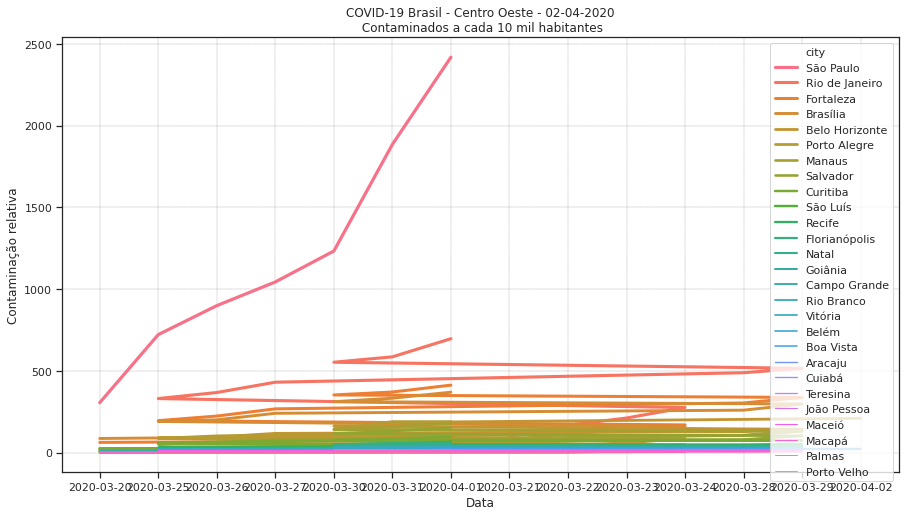

In [202]:
#hide
plt.figure(figsize=(15,8))

sns.lineplot(x=capitais_15.index,y='confirmed',data=capitais_15,hue='city',size="city")
plt.title('COVID-19 Brasil - Centro Oeste - {}\n Contaminados a cada 10 mil habitantes'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Contaminação relativa')
plt.savefig("plots/27_centroeste_relativa.png",bbox_inches = 'tight')

<center> <h2> Projeção de casos pela letalidade </h2> </center>


Há uma clara indicação de subnotificação da quantidade de casos no Brasil. Por isso, projetamos, de maneira simples, possíveis números baseados na taxa de letalidade de países que têm testado massivament, como Coréia do Sul, Alemanha e China (como uma base). Desse modo, multiplicamos o número de óbitos registrados no Brasil pelos fatores de cada um desses países e obtivemos essas projeções. Há um destaque para a Coréia do Sul pois, segundo fontes como o El Pais, é o país que mais realizou testes. A linha preta mostra os casos registrados no Brasil para que possa haver a comparação.

In [203]:
#hide
y = [1, 4, 6, 11, 18, 25, 34, 46, 57, 77, 92, 114, 136, 159, 201, 241]
y_06 = [166.66*x for x in y]
y_1 = [100*x for x in y]
y_2 = [50*x for x in y]
y_4 = [25*x for x in y]
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
y_1
brasil = [52, 77, 98, 121, 200, 234, 291, 428, 621, 904, 1128, 1546, 1891, 2201, 2433, 2915, 3417, 3904, 4256, 4579, 5717, 6836]
print(brasil[-16:])

[291, 428, 621, 904, 1128, 1546, 1891, 2201, 2433, 2915, 3417, 3904, 4256, 4579, 5717, 6836]


In [204]:
#hide
porjet_bra = pd.DataFrame()
porjet_bra['Dia desde o caso 50'] = x
porjet_bra['Brasil confirmado'] = brasil[-16:]
porjet_bra['Letalidade Alemanha'] = y_1
porjet_bra['Letalidade Coreia'] = y_2


porjet_bra

,Dia desde o caso 50,Brasil confirmado,Letalidade Alemanha,Letalidade Coreia
0,0,291,100,50
1,1,428,400,200
2,2,621,600,300
3,3,904,1100,550
4,4,1128,1800,900
5,5,1546,2500,1250
6,6,1891,3400,1700
7,7,2201,4600,2300
8,8,2433,5700,2850
9,9,2915,7700,3850


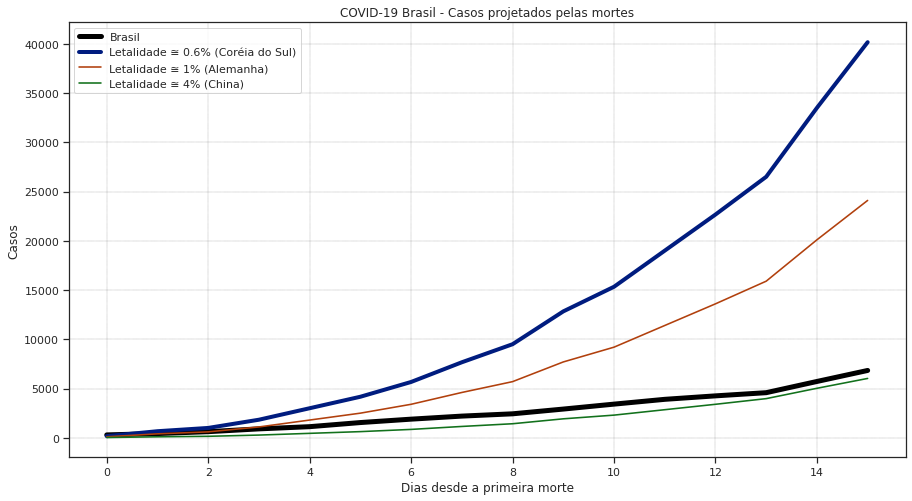

In [205]:
#hide_input
plt.figure(figsize=(15,8))

sns.lineplot(x=x,y=brasil[-16:],label='Brasil',color='black',linewidth=5)

sns.lineplot(x=x,y=y_06,label='Letalidade ≅ 0.6% (Coréia do Sul)',linewidth=4)
sns.lineplot(x=x,y=y_1,label='Letalidade ≅ 1% (Alemanha)')
sns.lineplot(x=x,y=y_4,label='Letalidade ≅ 4% (China)')


plt.title('COVID-19 Brasil - Casos projetados pelas mortes'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Dias desde a primeira morte')
plt.ylabel('Casos')
plt.savefig("plots/27_centroeste_relativa.png",bbox_inches = 'tight')

<center> <h2> Tabela das 200 cidades com mais casos </h2> </center>


In [206]:
#hide_input
pd.set_option('display.max_rows', None) 
x= cidade_last.sort_values('confirmed',axis=0,ascending=False)
x['Data'] = cidade_last.index
x.columns = ['Estado','Cidade','Casos','Mortes',"Data"]
x.reset_index(level=[0],drop=True)
x.head(200)

,Estado,Cidade,Casos,Mortes,Data
date,,,,,
2020-04-01,SP,São Paulo,2418,144.0,2020-04-01
2020-04-01,RJ,Rio de Janeiro,697,20.0,2020-04-01
2020-04-01,CE,Fortaleza,413,6.0,2020-04-01
2020-04-01,DF,Brasília,370,4.0,2020-04-01
2020-04-01,RS,Porto Alegre,190,3.0,2020-04-01
2020-04-01,MG,Belo Horizonte,188,2.0,2020-04-01
2020-04-01,AM,Manaus,179,2.0,2020-04-01
2020-04-01,BA,Salvador,153,2.0,2020-04-01
2020-04-01,PR,Curitiba,97,0.0,2020-04-01


In [208]:
#hide
x = capitais.stack()
x

date                 
2020-03-17  state                    AC
            city             Rio Branco
            confirmed                 3
            deaths                    0
2020-03-18  state                    AC
            city             Rio Branco
            confirmed                 3
            deaths                    0
2020-03-19  state                    AC
            city             Rio Branco
            confirmed                 4
            deaths                    0
2020-03-20  state                    AC
            city             Rio Branco
            confirmed                 7
            deaths                    0
2020-03-21  state                    AC
            city             Rio Branco
            confirmed                11
            deaths                    0
2020-03-22  state                    AC
            city             Rio Branco
            confirmed                11
            deaths                    0
2020-03-23  state 

In [0]:
#hide
casos_mar5.columns
casos_mar5['Dia']=  pd.to_datetime(casos_mar5['Dia'])
casos_mar5.set_index('Dia',inplace=True)

In [210]:
#hide
#hide
casos_mar5.index

DatetimeIndex(['2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26',
               ...
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
               '2020-03-31', '2020-04-01'],
              dtype='datetime64[ns]', name='Dia', length=402, freq=None)

In [211]:
#hide
import plotly.express as px

fig = px.bar(casos_mar5, x="Estado", y="Casos", color="Estado",
  animation_frame=casos_mar5.index, range_y=[0,4000])
fig.show()
#fig.update_layout( yaxis_type="log")



#fig.write_html("plots/11_letalidade.html")

ValueError: ignored

In [0]:
#hide
fig = px.line(sudeste, x="Dia",y='Relativa',color='Estado',color_discrete_sequence=px.colors.qualitative.G10,title="Curvas relativas dos estados brasileiros")    
fig.show()

In [0]:
#hide
sudeste['Dia'] = sudeste['Dia'].dt.strftime('%Y-%m-%d')


In [0]:
#hide
sudeste.set_index('Dia',inplace=True)


In [0]:
#hide
sudeste = sudeste.sort_index(ascending=True)



In [0]:
#hide
sudeste

In [212]:
#hide

fig = px.bar(sudeste, x="Casos", y="Estado", color="Estado",orientation='h',
             animation_frame='Dia', animation_group='Estado', range_x=[0,1000])
fig.show()

ValueError: ignored

In [0]:
#hide
casos_por_estado['date'] = casos_por_estado['date'].dt.strftime('%Y-%m-%d')


In [0]:
#hide
fig = px.bar(casos_por_estado, x="confirmed", y="state", color="state",orientation='h',
             animation_frame='date', animation_group='state', range_x=[0,1000])
fig.show()

In [0]:
#hide
casos.columns

In [0]:
#hide
sampa_meo = casos[casos['city']=='São Paulo']
sampa_meo= sampa_meo.sort_values('date',ascending=True)
sampa_meo['cumulativo'] = sampa_meo['confirmed'].cumsum()

sampa_meo

In [0]:
#hide
# absolute approach bar plot
df_last.sort_values('deaths',ascending=False,inplace=True)
plt.figure(figsize=(6,9))
sns.barplot(df_last['deaths'],df_last['state'],orient="h",)
plt.ylabel('Estados brasileiros')
plt.xlabel('Número total de mortes')
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.title('COVID-19 Brasil \n Casos totais por estado - {}'.format(today))


plt.savefig('plots/12_brasil',bbox_inches = 'tight')

In [0]:
#hide
casos_mar5.sort_values('Mortes',ascending=False,inplace=True)

hue = casos_mar5['Estado'].unique()

In [214]:
#hide
#hide
#Relativa approach line plot

plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Mortes',data=casos_mar5,hue='Estado',size="Estado",hue_order=hue)
plt.title('COVID-19 Brasil \n Mortes por estado  {} \n Estados expostos de forma decrescente quanto ao número relativo de casos'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Dia')
plt.ylabel('Número de casos a cada 10 mil habitantes')
#plt.savefig("plots/16_brasil_curva_relativa.png",bbox_inches = 'tight')

ValueError: ignored

<Figure size 1080x576 with 0 Axes>

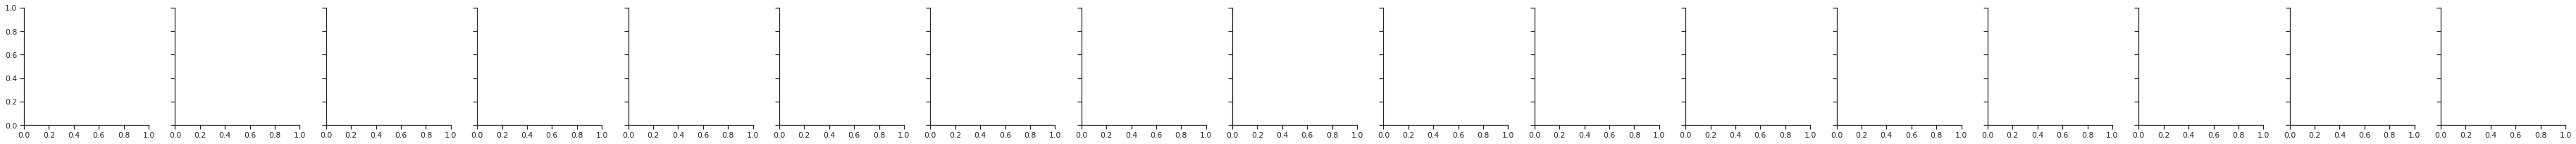

In [215]:
#hide
sns.FacetGrid(sul[sul['Estado']=='Paraná'],col='Casos',hue='Estado')